In [56]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import fiona
import pyproj
import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker

#import packages 
import os
from glob import glob
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
#import cartopy.crs as ccrs

#%matplotlib widget
%matplotlib inline

#import earthpy as et
#from adjustText import adjust_text

In [57]:
#install adjust text
!pip install -q https://github.com/Phlya/adjustText/archive/master.zip

In [58]:
!pwd
!ls


/Users/amandaworthy/Japan_work
City_Clerk_Neighborhoods.geojson  Seattle_Microclimate_Graphs.ipynb
Denver_weather.xlsx               Seattle_weather.xlsx
NSRDB_data                        US_Cities_Weather.ipynb
Precipitation_data                denvertest.csv
README.md


0      POLYGON ((-122.27398 47.69523, -122.27407 47.6...
1      POLYGON ((-122.28756 47.64523, -122.28754 47.6...
2      POLYGON ((-122.39529 47.66514, -122.39540 47.6...
3      POLYGON ((-122.39832 47.66609, -122.39830 47.6...
4      POLYGON ((-122.28851 47.65630, -122.28847 47.6...
                             ...                        
114    POLYGON ((-122.34470 47.70505, -122.34469 47.7...
115    POLYGON ((-122.33001 47.70864, -122.32994 47.7...
116    POLYGON ((-122.36607 47.70517, -122.36747 47.7...
117    POLYGON ((-122.36077 47.70512, -122.36099 47.7...
118    POLYGON ((-122.40211 47.69768, -122.40220 47.6...
Name: geometry, Length: 119, dtype: geometry

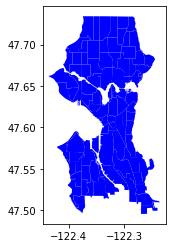

In [93]:
seattle_gdf = gpd.read_file('City_Clerk_Neighborhoods.geojson')
ax = seattle_gdf.plot(color='blue')

newshape= seattle_gdf.squeeze().geometry
newshape

In [94]:
newshape

0      POLYGON ((-122.27398 47.69523, -122.27407 47.6...
1      POLYGON ((-122.28756 47.64523, -122.28754 47.6...
2      POLYGON ((-122.39529 47.66514, -122.39540 47.6...
3      POLYGON ((-122.39832 47.66609, -122.39830 47.6...
4      POLYGON ((-122.28851 47.65630, -122.28847 47.6...
                             ...                        
114    POLYGON ((-122.34470 47.70505, -122.34469 47.7...
115    POLYGON ((-122.33001 47.70864, -122.32994 47.7...
116    POLYGON ((-122.36607 47.70517, -122.36747 47.7...
117    POLYGON ((-122.36077 47.70512, -122.36099 47.7...
118    POLYGON ((-122.40211 47.69768, -122.40220 47.6...
Name: geometry, Length: 119, dtype: geometry

In [91]:
outdir = '/Users/amandaworthy/Norway_sport_facility/Energy_consumption_of_sport_facilities_in_norway/climate_data'
t_mean_fn = os.path.join(outdir, '1month_mean_Global_ea_2t.nc')
t_mean_ds = xr.open_dataset(t_mean_fn)

In [92]:
t_mean_ds2021 = t_mean_ds.sel(time=slice("2020-01-01", "2020-12-31"))



In [95]:
t_mean_ds2021

<xarray.Dataset>
Dimensions:    (time: 12, latitude: 721, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-02-28T08:01 GRIB to CDM+CF via cfgrib-0.9.1...

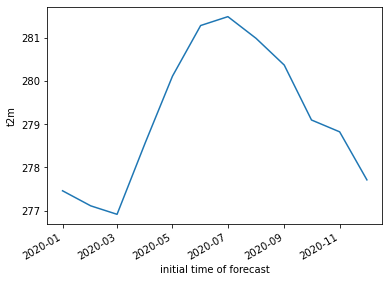

In [103]:
t_mean_ds2021['t2m'].mean(dim=('latitude', 'longitude')).plot();

In [87]:
seattle_bounds = newshape.total_bounds
seattle_bounds

def myround(x, base=0.25):
    return base * np.round(x/base)

def roundbounds(bounds, base=0.25):
    bounds_floor = np.floor(bounds/base)*base
    bounds_ceil = np.ceil(bounds/base)*base
    return [bounds_floor[0]-5, bounds_floor[1]-5, bounds_ceil[2]+10, bounds_ceil[3]]



In [88]:
seattle_rbounds = roundbounds(seattle_bounds)
seattle_rbounds

[-127.5, 42.25, -112.0, 47.75]

In [89]:
t_mean_ds2021_seattle = t_mean_ds2021.sel(latitude=slice(seattle_rbounds[3],seattle_rbounds[1]), longitude=slice(seattle_rbounds[0],seattle_rbounds[2]))

t_mean_ds2021_seattle

t_mean_ds2021_seattle['Average Temperature in 2021 (c)']= t_mean_ds2021_seattle['t2m']- 273.15
t_mean_ds2021_seattle

<xarray.Dataset>
Dimensions:                          (time: 12, latitude: 23, longitude: 0)
Coordinates:
  * time                             (time) datetime64[ns] 2020-01-01 ... 202...
  * latitude                         (latitude) float64 47.75 47.5 ... 42.25
  * longitude                        (longitude) float64 
Data variables:
    t2m                              (time, latitude, longitude) float32 
    Average Temperature in 2021 (c)  (time, latitude, longitude) float32 
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-02-28T08:01 GRIB to CDM+CF via cfgrib-0.9.1...

In [90]:
t_mean_ds2021_seattle['Average Temperature in 2021 (c)'].max()

ValueError: zero-size array to reduction operation fmax which has no identity

In [69]:
import cartopy.crs as ccrs

In [70]:
newshape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [71]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(70)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
65,20107509,Africa,Burkina Faso,BFA,32990.0,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127..."
66,5625118,Africa,Central African Rep.,CAF,3206.0,"POLYGON ((27.37423 5.23394, 27.04407 5.12785, ..."
67,4954674,Africa,Congo,COG,30270.0,"POLYGON ((18.45307 3.50439, 18.39379 2.90044, ..."
68,1772255,Africa,Gabon,GAB,35980.0,"POLYGON ((11.27645 2.26105, 11.75167 2.32676, ..."


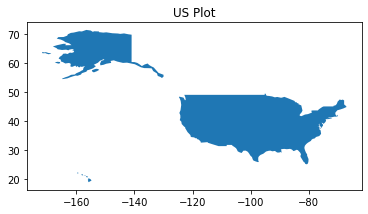

In [72]:

idx = (world['name']=='United States of America') 
US= world[idx]
ax= US.plot(aspect= 'equal')
ax.set_title("US Plot");

In [76]:
t_mean_ds2021_seattle

<xarray.Dataset>
Dimensions:                          (time: 12, latitude: 23, longitude: 0)
Coordinates:
  * time                             (time) datetime64[ns] 2021-01-01 ... 202...
  * latitude                         (latitude) float64 47.75 47.5 ... 42.25
  * longitude                        (longitude) float64 
    spatial_ref                      int64 0
Data variables:
    t2m                              (time, latitude, longitude) float32 
    Average Temperature in 2021 (c)  (time, latitude, longitude) float32 
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-02-28T08:01 GRIB to CDM+CF via cfgrib-0.9.1...

TypeError: Invalid shape (12, 23, 0) for image data

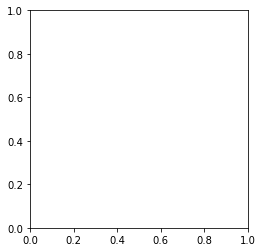

In [82]:
plt.imshow(t_mean_ds2021_seattle['Average Temperature in 2021 (c)'].mean, extent=seattle_rbounds, cmap='hot')

In [73]:
t_mean_ds2021_seattle_land = t_mean_ds2021_seattle['Average Temperature in 2021 (c)'].rio.clip(world.geometry, crs=world.crs, drop=False)

NoDataInBounds: Unable to determine bounds from coordinates. Data variable: Average Temperature in 2021 (c)

AttributeError: 'Dataset' object has no attribute 'scatter'

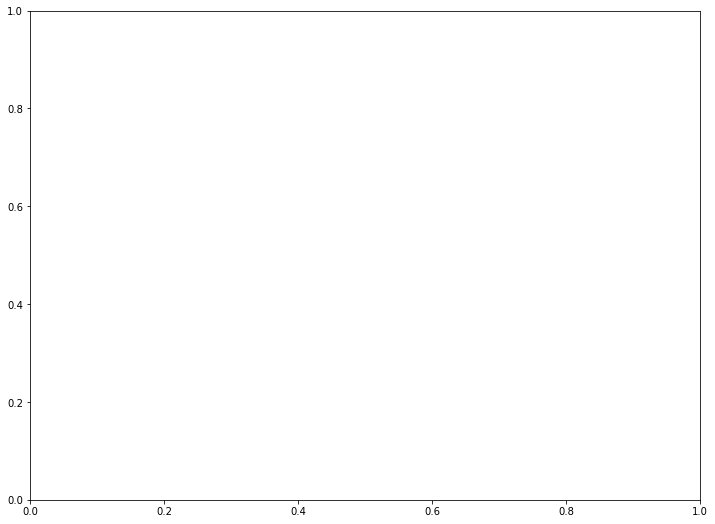

In [79]:
f, ax = plt.subplots(figsize=(12,9))

#add data to plot
t_mean_ds2021_seattle.mean(dim='time').scatter.plot(ax=ax, cmap='inferno', alpha=.8, vmin=-10, vmax=10, label= 'this')#, clim=(-50,50));

ImportError: Plotting of arrays of cftime.datetime objects or arrays indexed by cftime.datetime objects requires the optional `nc-time-axis` (v1.2.0 or later) package.

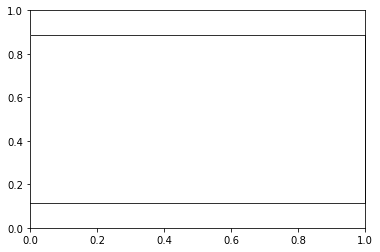